In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
VGG19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
VGG19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
for layer in VGG19.layers:
    layer.trainable = False

In [ ]:
folders = glob('drive/MyDrive/Dataset/Train/*')
folders

['drive/MyDrive/Dataset/Train/Uninfected',
 'drive/MyDrive/Dataset/Train/Parasite']

In [ ]:
x=Flatten()(VGG19.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=VGG19.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('drive/MyDrive/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('drive/MyDrive/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=40,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/40
13/13 [==============================] - 6s 465ms/step - loss: 0.0810 - accuracy: 0.9784 - val_loss: 0.2147 - val_accuracy: 0.9030
Epoch 2/40
13/13 [==============================] - 6s 449ms/step - loss: 0.0646 - accuracy: 0.9832 - val_loss: 0.2384 - val_accuracy: 0.9030
Epoch 3/40
13/13 [==============================] - 6s 449ms/step - loss: 0.0916 - accuracy: 0.9639 - val_loss: 0.1590 - val_accuracy: 0.9403
Epoch 4/40
13/13 [==============================] - 6s 453ms/step - loss: 0.0762 - accuracy: 0.9832 - val_loss: 0.2425 - val_accuracy: 0.9030
Epoch 5/40
13/13 [==============================] - 6s 447ms/step - loss: 0.0739 - accuracy: 0.9784 - val_loss: 0.2009 - val_accuracy: 0.9179
Epoch 6/40
13/13 [==============================] - 6s 446ms/step - loss: 0.0826 - accuracy: 0.9688 - val_loss: 0.1533 - val_accuracy: 0.9403
Epoch 7/40
13/13 [==============================] - 6s 443ms/step - loss: 0.0667 - accuracy: 0.9856 - val_loss: 0.1665 - val_accuracy: 0.9403
Epoch 

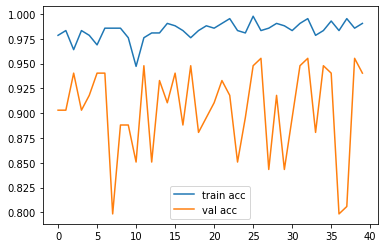

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

model.save('model2_vgg19.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[6.75628781e-02, 9.32437122e-01],
       [9.93958592e-01, 6.04141736e-03],
       [3.26660872e-02, 9.67333853e-01],
       [1.01854250e-01, 8.98145795e-01],
       [7.23201707e-02, 9.27679837e-01],
       [1.71422735e-02, 9.82857704e-01],
       [9.99999762e-01, 1.96878545e-07],
       [2.23467238e-02, 9.77653265e-01],
       [1.18166227e-02, 9.88183439e-01],
       [9.99982715e-01, 1.72710570e-05],
       [9.99969721e-01, 3.03376873e-05],
       [6.54186964e-01, 3.45813036e-01],
       [5.69336593e-01, 4.30663407e-01],
       [9.99991894e-01, 8.14119085e-06],
       [6.71176672e-01, 3.28823268e-01],
       [6.97010234e-02, 9.30298924e-01],
       [9.99023080e-01, 9.76898824e-04],
       [9.99358118e-01, 6.41876599e-04],
       [9.99839425e-01, 1.60493626e-04],
       [5.94563484e-01, 4.05436486e-01],
       [9.90418613e-01, 9.58137028e-03],
       [9.99728620e-01, 2.71346740e-04],
       [9.56313968e-01, 4.36860286e-02],
       [9.99871731e-01, 1.28270040e-04],
       [9.045680

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model2_vgg19.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/Dataset/Test/Uninfected/3.png',target_size=(224,224))

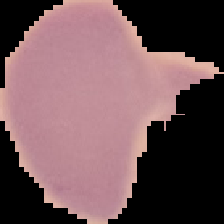

In [ ]:
img

In [ ]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
#img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(x)

array([[0.18536761, 0.8146324 ]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(x), axis=1)

In [ ]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
